# Calories Burnt Prediction

- Author: Sanjay S Rao
- LinkenIn: www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0
- e-mail - sanjay.s.rao04@gmail.com

## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Problem:
To predict the total calories burnt by a person, given the activity details. 

## Data Collection & Processing

dataset link: https://www.kaggle.com/fmendes/fmendesdat263xdemos

In [2]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [3]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv('exercise.csv')

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining the two Dataframes

In [6]:
calories_df = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
# checking the number of rows and columns
calories_df.shape

(15000, 9)

In [9]:
# getting some informations about the data
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
# checking for missing values
calories_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
# get some statistical measures about the data
calories_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Visualization

In [12]:
sns.set()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


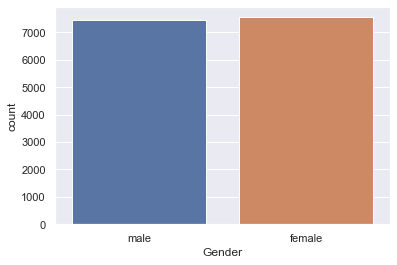

In [13]:
# plotting the gender column in count plot
sns.countplot(calories_df['Gender'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


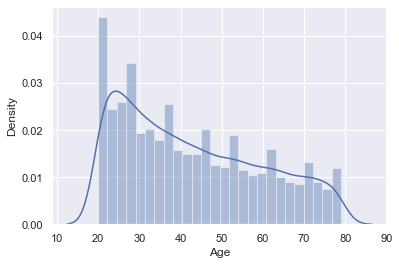

In [14]:
# finding the distribution of "Age" column
sns.distplot(calories_df['Age'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


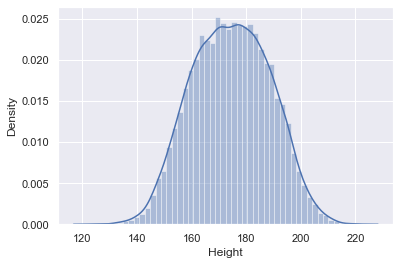

In [15]:
# finding the distribution of "Height" column
sns.distplot(calories_df['Height'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


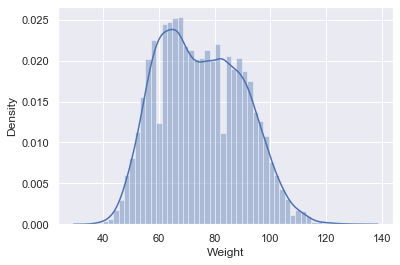

In [16]:
# finding the distribution of "Weight" column
sns.distplot(calories_df['Weight'])

## Finding the Correlation in the dataset

In [17]:
correlation = calories_df.corr()

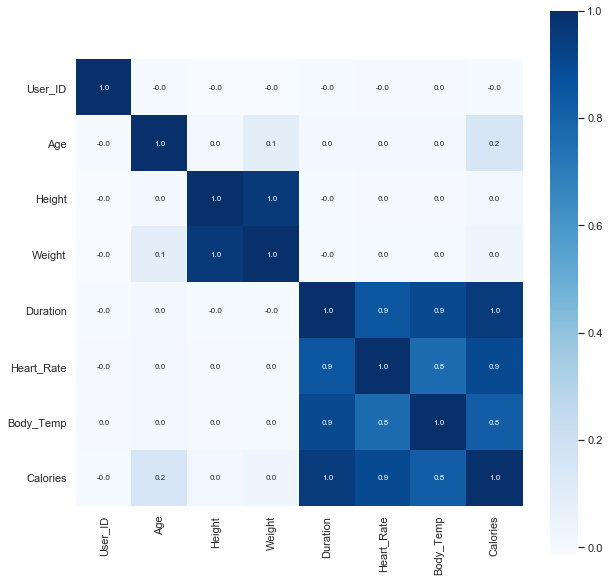

In [18]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


## Converting the text data to numerical values

In [19]:
calories_df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [20]:
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Separating features and Target

In [21]:
X = calories_df.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_df['Calories']

In [22]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [23]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


## Splitting the data into training data and Test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## Model Training

## 1. XGBoost Regressor

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

Regression predictive modeling problems involve predicting a numerical value such as a dollar amount or a height. XGBoost can be used directly for regression predictive modeling.

In [27]:
#!pip install xgboost
from xgboost import XGBRegressor
# loading the model
model1 = XGBRegressor()
# training the model with X_train
model1.fit(X_train, Y_train)

#test data predictions
test_data_prediction1 = model1.predict(X_test)
print(test_data_prediction1)


[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean absolute error

In [28]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction1)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4807048829992613


## 2. RandomForestRegressor

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

In [29]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100,random_state=0)
model2.fit(X_train,Y_train)
test_data_prediction2 = model2.predict(X_test)
print(test_data_prediction2)

[128.36 224.07  36.79 ... 146.58  23.87  89.94]


In [30]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction2)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.6832766666666665


## 3. Support Vector Machine - SVR

Supervised Machine Learning Models with associated learning algorithms that analyze data for classification and regression analysis are known as Support Vector Regression. SVR is built based on the concept of Support Vector Machine or SVM. It is one among the popular Machine Learning models that can be used in classification problems or assigning classes when the data is not linearly separable.

In [31]:
from sklearn import svm
model3 = svm.SVR()
model3.fit(X_train,Y_train)
test_data_prediction3 = model3.predict(X_test)
print(test_data_prediction3)

[123.04017365 173.117781    56.41704389 ... 138.00300555  22.00311932
  94.25110648]


In [32]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction3)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  10.620614362927721


## 4. Catboost

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today. To top it up, it provides best-in-class accuracy.

It is especially powerful in two ways:

* It yields state-of-the-art results without extensive data training typically required by other machine learning methods, and
* Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.

“CatBoost” name comes from two words “Category” and “Boosting”.

In [33]:
!pip install catboost

In [34]:
from catboost import CatBoostRegressor
model4 = CatBoostRegressor()
model4.fit(X_train,Y_train)
test_data_prediction4 = model4.predict(X_test)
print(test_data_prediction4)

Learning rate set to 0.06063
0:	learn: 59.0633191	total: 140ms	remaining: 2m 19s
1:	learn: 55.8781450	total: 142ms	remaining: 1m 11s
2:	learn: 52.8127867	total: 145ms	remaining: 48.2s
3:	learn: 49.9519531	total: 148ms	remaining: 36.8s
4:	learn: 47.3023222	total: 151ms	remaining: 29.9s
5:	learn: 44.7787389	total: 153ms	remaining: 25.4s
6:	learn: 42.4222618	total: 157ms	remaining: 22.3s
7:	learn: 40.2724922	total: 160ms	remaining: 19.8s
8:	learn: 38.1889349	total: 162ms	remaining: 17.9s
9:	learn: 36.1544597	total: 165ms	remaining: 16.3s
10:	learn: 34.3390111	total: 168ms	remaining: 15.1s
11:	learn: 32.5985595	total: 171ms	remaining: 14.1s
12:	learn: 30.9249778	total: 174ms	remaining: 13.2s
13:	learn: 29.3711851	total: 176ms	remaining: 12.4s
14:	learn: 27.8473666	total: 179ms	remaining: 11.8s
15:	learn: 26.4267625	total: 182ms	remaining: 11.2s
16:	learn: 25.0811706	total: 184ms	remaining: 10.7s
17:	learn: 23.8648622	total: 187ms	remaining: 10.2s
18:	learn: 22.7237102	total: 190ms	remainin

161:	learn: 2.0552522	total: 523ms	remaining: 2.7s
162:	learn: 2.0464698	total: 525ms	remaining: 2.7s
163:	learn: 2.0374575	total: 527ms	remaining: 2.69s
164:	learn: 2.0281535	total: 530ms	remaining: 2.68s
165:	learn: 2.0184413	total: 532ms	remaining: 2.67s
166:	learn: 2.0104260	total: 535ms	remaining: 2.67s
167:	learn: 2.0055918	total: 537ms	remaining: 2.66s
168:	learn: 1.9908173	total: 540ms	remaining: 2.65s
169:	learn: 1.9840872	total: 542ms	remaining: 2.65s
170:	learn: 1.9779690	total: 544ms	remaining: 2.64s
171:	learn: 1.9661852	total: 547ms	remaining: 2.63s
172:	learn: 1.9570927	total: 549ms	remaining: 2.63s
173:	learn: 1.9503182	total: 552ms	remaining: 2.62s
174:	learn: 1.9395346	total: 554ms	remaining: 2.61s
175:	learn: 1.9298655	total: 557ms	remaining: 2.61s
176:	learn: 1.9211854	total: 559ms	remaining: 2.6s
177:	learn: 1.9104683	total: 562ms	remaining: 2.59s
178:	learn: 1.8958670	total: 564ms	remaining: 2.59s
179:	learn: 1.8824172	total: 567ms	remaining: 2.58s
180:	learn: 1.8

391:	learn: 0.9878400	total: 1.05s	remaining: 1.63s
392:	learn: 0.9867313	total: 1.05s	remaining: 1.63s
393:	learn: 0.9841771	total: 1.06s	remaining: 1.63s
394:	learn: 0.9818242	total: 1.06s	remaining: 1.62s
395:	learn: 0.9800758	total: 1.06s	remaining: 1.62s
396:	learn: 0.9788041	total: 1.06s	remaining: 1.62s
397:	learn: 0.9769738	total: 1.07s	remaining: 1.61s
398:	learn: 0.9755622	total: 1.07s	remaining: 1.61s
399:	learn: 0.9738278	total: 1.07s	remaining: 1.61s
400:	learn: 0.9707365	total: 1.07s	remaining: 1.61s
401:	learn: 0.9697217	total: 1.08s	remaining: 1.6s
402:	learn: 0.9682453	total: 1.08s	remaining: 1.6s
403:	learn: 0.9670382	total: 1.08s	remaining: 1.6s
404:	learn: 0.9647800	total: 1.08s	remaining: 1.59s
405:	learn: 0.9631063	total: 1.09s	remaining: 1.59s
406:	learn: 0.9618503	total: 1.09s	remaining: 1.59s
407:	learn: 0.9604838	total: 1.09s	remaining: 1.58s
408:	learn: 0.9575274	total: 1.09s	remaining: 1.58s
409:	learn: 0.9535535	total: 1.1s	remaining: 1.58s
410:	learn: 0.95

619:	learn: 0.7054905	total: 1.58s	remaining: 972ms
620:	learn: 0.7040168	total: 1.59s	remaining: 969ms
621:	learn: 0.7029743	total: 1.59s	remaining: 967ms
622:	learn: 0.7021937	total: 1.59s	remaining: 964ms
623:	learn: 0.7007863	total: 1.59s	remaining: 962ms
624:	learn: 0.7001490	total: 1.6s	remaining: 959ms
625:	learn: 0.6998297	total: 1.6s	remaining: 957ms
626:	learn: 0.6986212	total: 1.6s	remaining: 954ms
627:	learn: 0.6971400	total: 1.61s	remaining: 952ms
628:	learn: 0.6958612	total: 1.61s	remaining: 949ms
629:	learn: 0.6946838	total: 1.61s	remaining: 946ms
630:	learn: 0.6933266	total: 1.61s	remaining: 944ms
631:	learn: 0.6925689	total: 1.61s	remaining: 941ms
632:	learn: 0.6914844	total: 1.62s	remaining: 938ms
633:	learn: 0.6907874	total: 1.62s	remaining: 936ms
634:	learn: 0.6895230	total: 1.62s	remaining: 933ms
635:	learn: 0.6889350	total: 1.63s	remaining: 931ms
636:	learn: 0.6881480	total: 1.63s	remaining: 928ms
637:	learn: 0.6873907	total: 1.63s	remaining: 925ms
638:	learn: 0.6

841:	learn: 0.5784437	total: 2.12s	remaining: 397ms
842:	learn: 0.5779973	total: 2.12s	remaining: 395ms
843:	learn: 0.5777077	total: 2.12s	remaining: 392ms
844:	learn: 0.5771379	total: 2.12s	remaining: 390ms
845:	learn: 0.5768028	total: 2.13s	remaining: 387ms
846:	learn: 0.5762727	total: 2.13s	remaining: 385ms
847:	learn: 0.5760831	total: 2.13s	remaining: 382ms
848:	learn: 0.5752796	total: 2.13s	remaining: 379ms
849:	learn: 0.5747687	total: 2.13s	remaining: 377ms
850:	learn: 0.5743375	total: 2.14s	remaining: 374ms
851:	learn: 0.5742607	total: 2.14s	remaining: 372ms
852:	learn: 0.5737820	total: 2.14s	remaining: 369ms
853:	learn: 0.5732270	total: 2.15s	remaining: 367ms
854:	learn: 0.5728700	total: 2.15s	remaining: 364ms
855:	learn: 0.5726129	total: 2.15s	remaining: 362ms
856:	learn: 0.5720470	total: 2.15s	remaining: 359ms
857:	learn: 0.5718174	total: 2.15s	remaining: 357ms
858:	learn: 0.5712280	total: 2.16s	remaining: 354ms
859:	learn: 0.5710103	total: 2.16s	remaining: 351ms
860:	learn: 

[127.56976258 224.03545721  37.2737386  ... 144.48653835  24.02335067
  90.27181995]


In [35]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction4)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  0.4814918319764509


## 5. Gradient Boosting Regression

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
model5 = GradientBoostingRegressor()
model5.fit(X_train,Y_train)
test_data_prediction5 = model5.predict(X_test)
print(test_data_prediction5)

[127.1327758  226.19124002  38.36556999 ... 145.16622941  23.32577361
  92.28350552]


In [37]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction5)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  2.778304266644558


## Conclusion

As we can observe from the mean absolute errors obtained from 5 kinds of regressor models used in order to predict the calories burnt, CatBoost had the least MAE (0.48) . This suggests that, CatBoost worked well in this case.

Apart from CatBoost, Random Forest Regressor also performed well, with a MAE of 1.68